# WeatherPy
----

### Analysis
* We observe the highest daily high temperatures as we approach the equator. Interestingly, we see higher average highs in the southern hemisphere compared to the highs at the equivalent latitude in the northern hemisphere. Given that this data was pulled in January (southern hemisphere's summer), this probably makes sense.

* We do not observe any noteworth relationship between the latitude of a city and its cloudiness. Worth note, however, is that cloudiness values appear to take a fixed range of values. This is likely because these are estimates made by humans, as opposed to a truly continuous measurement of sky coverage.

* There is a weakly upside-down U-shaped pattern to the graph of humidity % and latitude. Cities close to the equator appear to be far less likely to be experience low humidity. This makes sense when we think about typical weather in the tropics.

---

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'cities_weather_data.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities[0:20]

citipy.nearest_city(lat_lng[0], lat_lng[1])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists for temperatures
tempf=[]
# Create lists for wind speed
windspeed=[]
# Create lists for humidity
humidity=[]
# Create lists for cloudiness
cloudiness=[]

# Create lists for latitude
lats=[]
longs=[]

# Create lists for longitude

# Create list of cities for which we have data
good_cities=[]

# Create counter variable
city_counter=0
batch_counter=1

for city in cities:
    city_counter+=1
    use_url=query_url + city
    response = requests.get(use_url).json()
    print(f"Processing record {city_counter} of batch {batch_counter} | {city} \n{use_url}")
    
    if city_counter % 50 == 0:
        time.sleep(2)
        city_counter=0
        batch_counter+=1
    
    try:
        good_cities.append(response['name'])
        tempf.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
    except KeyError:
        continue

Processing record 1 of batch 1 | sao gabriel da cachoeira 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=sao gabriel da cachoeira
Processing record 2 of batch 1 | riohacha 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=riohacha
Processing record 3 of batch 1 | vila velha 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=vila velha
Processing record 4 of batch 1 | maarianhamina 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=maarianhamina
Processing record 5 of batch 1 | usolye 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=usolye
Processing record 6 of batch 1 | rio gallegos 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=rio gallegos
Processing record 7 

Processing record 3 of batch 2 | cabra 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=cabra
Processing record 4 of batch 2 | ekhabi 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=ekhabi
Processing record 5 of batch 2 | mwinilunga 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=mwinilunga
Processing record 6 of batch 2 | volovo 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=volovo
Processing record 7 of batch 2 | hambantota 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=hambantota
Processing record 8 of batch 2 | hilo 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=hilo
Processing record 9 of batch 2 | amderma 
http://api.openweathermap.org/data/2.5/wea

Processing record 6 of batch 3 | luis correia 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=luis correia
Processing record 7 of batch 3 | srednekolymsk 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=srednekolymsk
Processing record 8 of batch 3 | songea 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=songea
Processing record 9 of batch 3 | khonuu 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=khonuu
Processing record 10 of batch 3 | taltal 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=taltal
Processing record 11 of batch 3 | chokurdakh 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=chokurdakh
Processing record 12 of batch 3 | whitehorse 
http://api.o

Processing record 10 of batch 4 | leningradskiy 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=leningradskiy
Processing record 11 of batch 4 | sangar 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=sangar
Processing record 12 of batch 4 | xiamen 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=xiamen
Processing record 13 of batch 4 | ribeira grande 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=ribeira grande
Processing record 14 of batch 4 | ha tinh 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=ha tinh
Processing record 15 of batch 4 | coihaique 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=coihaique
Processing record 16 of batch 4 | airai 
http://ap

Processing record 13 of batch 5 | farmington 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=farmington
Processing record 14 of batch 5 | palabuhanratu 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=palabuhanratu
Processing record 15 of batch 5 | iqaluit 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=iqaluit
Processing record 16 of batch 5 | votice 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=votice
Processing record 17 of batch 5 | bengkulu 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=bengkulu
Processing record 18 of batch 5 | sitka 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=sitka
Processing record 19 of batch 5 | comodoro rivadavia 
http://a

Processing record 17 of batch 6 | nome 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=nome
Processing record 18 of batch 6 | nizhneyansk 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=nizhneyansk
Processing record 19 of batch 6 | hamilton 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=hamilton
Processing record 20 of batch 6 | sistranda 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=sistranda
Processing record 21 of batch 6 | khani 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=khani
Processing record 22 of batch 6 | maumelle 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=maumelle
Processing record 23 of batch 6 | itarema 
http://api.openweathermap.o

Processing record 20 of batch 7 | chaozhou 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=chaozhou
Processing record 21 of batch 7 | fez 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=fez
Processing record 22 of batch 7 | college 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=college
Processing record 23 of batch 7 | matara 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=matara
Processing record 24 of batch 7 | atambua 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=atambua
Processing record 25 of batch 7 | izumo 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=izumo
Processing record 26 of batch 7 | algiers 
http://api.openweathermap.org/data/2.5/weathe

Processing record 23 of batch 8 | itoman 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=itoman
Processing record 24 of batch 8 | alegre 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=alegre
Processing record 25 of batch 8 | todos santos 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=todos santos
Processing record 26 of batch 8 | albion 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=albion
Processing record 27 of batch 8 | harper 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=harper
Processing record 28 of batch 8 | auxerre 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=auxerre
Processing record 29 of batch 8 | tsihombe 
http://api.openweathermap.org/

Processing record 26 of batch 9 | iskateley 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=iskateley
Processing record 27 of batch 9 | taoudenni 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=taoudenni
Processing record 28 of batch 9 | rocha 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=rocha
Processing record 29 of batch 9 | catazaja 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=catazaja
Processing record 30 of batch 9 | locri 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=locri
Processing record 31 of batch 9 | olinda 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=olinda
Processing record 32 of batch 9 | cochabamba 
http://api.openweathermap.org/

Processing record 30 of batch 10 | lasa 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=lasa
Processing record 31 of batch 10 | mount isa 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=mount isa
Processing record 32 of batch 10 | altayskoye 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=altayskoye
Processing record 33 of batch 10 | kibondo 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=kibondo
Processing record 34 of batch 10 | vestmannaeyjar 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=vestmannaeyjar
Processing record 35 of batch 10 | dingle 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=dingle
Processing record 36 of batch 10 | vostok 
http://api.

Processing record 33 of batch 11 | winsum 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=winsum
Processing record 34 of batch 11 | pocoes 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=pocoes
Processing record 35 of batch 11 | kouango 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=kouango
Processing record 36 of batch 11 | aktas 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=aktas
Processing record 37 of batch 11 | qostanay 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=qostanay
Processing record 38 of batch 11 | georgiyevka 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=georgiyevka
Processing record 39 of batch 11 | kyrksaeterora 
http://api.openwea

Processing record 36 of batch 12 | kabul 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=kabul
Processing record 37 of batch 12 | katobu 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=katobu
Processing record 38 of batch 12 | floro 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=floro
Processing record 39 of batch 12 | hede 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=hede
Processing record 40 of batch 12 | awjilah 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=awjilah
Processing record 41 of batch 12 | progreso 
http://api.openweathermap.org/data/2.5/weather?appid=2c722d1c0e88c919595186943c9f7b2e&units=imperial&q=progreso
Processing record 42 of batch 12 | bereda 
http://api.openweathermap.org/data/2.5/we

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
# Convert output to dataframe
cities_df=pd.DataFrame(
    {'City':good_cities,
    'Temp':tempf,
    'Wind':windspeed,
    'Clouds':cloudiness,
    'Humidity':humidity,
    'Latitude':lats,
    'Longitude':longs}
)

# Export dataframe to CSV
cities_df.to_csv('cities_weather_data.csv')

# Display top of dataframe
cities_df.head()

,City,Temp,Wind,Clouds,Humidity,Latitude,Longitude
0,Sao Gabriel da Cachoeira,76.11,2.73,0,90,-0.13,-67.09
1,Riohacha,80.25,14.03,0,79,11.54,-72.91
2,Vila Velha,82.00,6.93,75,88,-3.71,-38.60
3,Usolye,21.00,8.01,80,80,59.42,56.68
4,Rio Gallegos,50.00,6.93,90,66,-51.62,-69.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

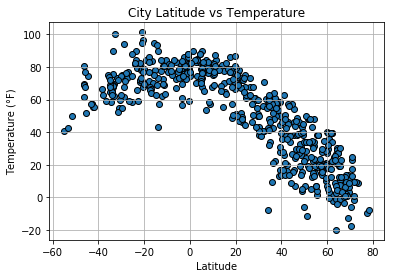

In [90]:
# Plot data
plt.scatter(cities_df['Latitude'],cities_df['Temp'],edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('City Latitude vs Temperature')
plt.savefig('City Lat vs Temperature.png')

plt.show()

#### Latitude vs. Humidity Plot

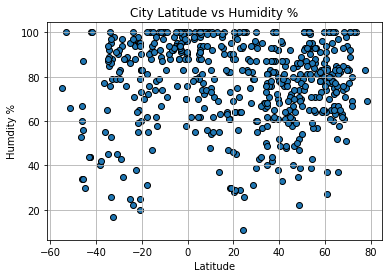

In [89]:
# Plot data
plt.scatter(cities_df['Latitude'],cities_df['Humidity'],edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humdity %')
plt.title('City Latitude vs Humidity %')
plt.savefig('City Lat vs Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

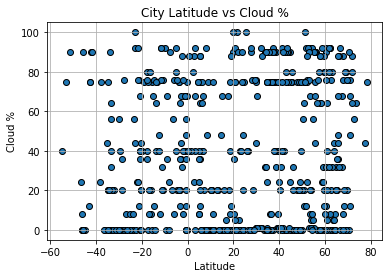

In [88]:
# Plot data
plt.scatter(cities_df['Latitude'],cities_df['Clouds'],edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloud %')
plt.title('City Latitude vs Cloud %')
plt.savefig('City Lat vs Clouds.png')

plt.show()

#### Latitude vs. Wind Speed Plot

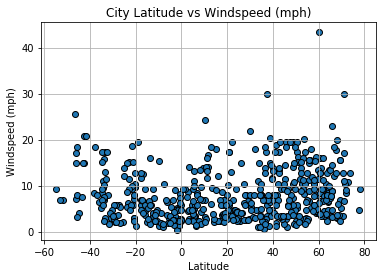

In [87]:
plt.scatter(cities_df['Latitude'],cities_df['Wind'],edgecolor='black')

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('City Latitude vs Windspeed (mph)')
plt.savefig('City Lat vs Winds.png')

plt.show()